# Trees and Forests

## Training a Decision Tree Classifier

Problem : You need to train a classifier using a decision tree.

In [1]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [3]:
features.shape

(150, 4)

In [5]:
features[:10], target[:10]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [4]:
# Make new observation
observation = [[ 5,  4,  3,  2]]

# Predict observation's class
model.predict(observation)

array([1])

In [6]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[ 0.,  1.,  0.]])

In [7]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', 
                                              random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

In [8]:
# Predict observation's class
model_entropy.predict(observation)

array([1])

## Training a Decision Tree Regressor

Problem : You need to train a regression model using a decision tree.

In [9]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [10]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([ 33.])

In [11]:
# Create decision tree classifier object using entropy
# we can construct a tree whose splits reduce mean absolute error (MAE):
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)

## Visualizing a Decision Tree Model

Problem : You need to visualize a model created by a decision tree learning algorithm.

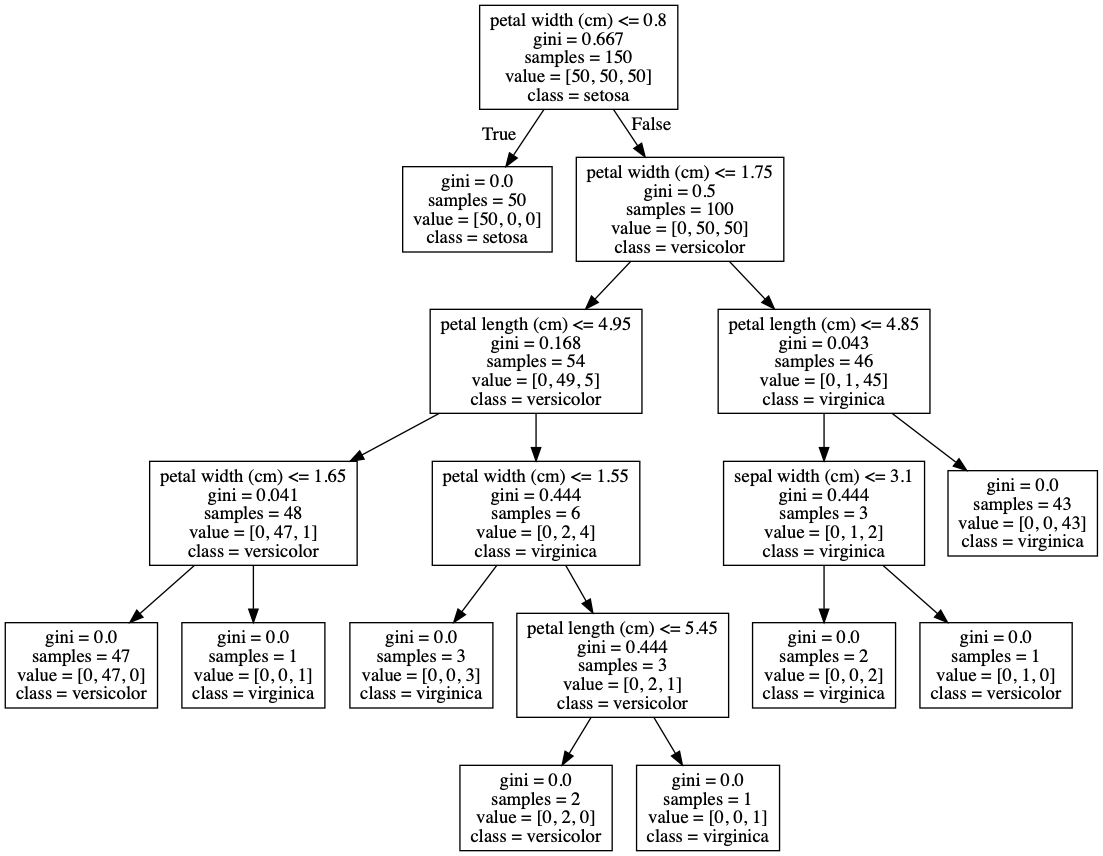

In [13]:
# Load libraries
import pydotplus
from IPython.display import Image
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [14]:
# Create PDF
graph.write_pdf("iris.pdf")

True

In [15]:
# Create PNG
graph.write_png("iris.png")

True

## Training a Random Forest Classifier

Problem : You want to train a classification model using a “forest” of randomized decision trees.

In [16]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
# Make new observation
observation = [[ 5,  4,  3,  2]]

# Predict observation's class
model.predict(observation)

array([1])

In [18]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
    criterion="entropy", 
    random_state=0)

# Train model
model_entropy = randomforest_entropy.fit(features, target)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


`n_estimators` sets the number of decision trees to include in the forest.

the `bootstrap` parameter allows us to set whether the subset of observations considered for a tree is created using sampling with replacement (the default setting) or without replacement.

the `max_features` parameter determines the maximum number of features to be considered at each node and takes a number of arguments including integers (number of features), floats (percentage of features), and sqrt (square root of the number of features). `max_features` is set to auto, which acts the same as sqrt

## Training a Random Forest Regressor

Problem : You want to train a regression model using a “forest” of randomized decision trees.

In [20]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


`max_features` sets the maximum number of features to consider at each node. Defaults to $\sqrt{p}$ features, where `p` is the total number of features.

`bootstrap` sets whether or not to sample with replacement. Defaults to `True`.

`n_estimators` sets the number of decision trees to construct. Defaults to 10.

## Identifying Important Features in Random Forests

Problem : You need to know which features are most important in a random forest model.

In [23]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
names

['petal width (cm)',
 'petal length (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

In [26]:
importances

array([ 0.11896532,  0.0231668 ,  0.36804744,  0.48982043])

In [28]:
np.argsort(importances)

array([1, 0, 2, 3])

In [31]:
np.argsort(importances)[::-1]

array([3, 2, 0, 1])

In [27]:
indices

array([3, 2, 0, 1])

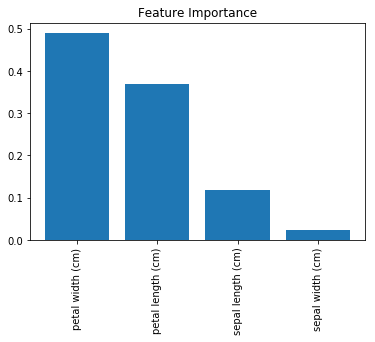

In [25]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [34]:
# View feature importances
model.feature_importances_

array([ 0.11896532,  0.0231668 ,  0.36804744,  0.48982043])

The higher the number, the more important the feature (all importance scores sum to 1)

## Selecting Important Features in Random Forests

Problem : You need to conduct feature selection on a random forest.

In [36]:
# Load libraries
from sklearn.feature_selection import SelectFromModel

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most important features
model = randomforest.fit(features_important, target)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


we used the SelectFromModel method to create a feature matrix containing only features with an importance greater than or equal to some threshold value.

## Handling Imbalanced Classes

Problem: You have a target vector with highly imbalanced classes and want to train a random forest model.

In [37]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

In [38]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, 
                                      n_jobs=-1, 
                                      class_weight="balanced")
                                    # We can set RandomForestClassifier to correct for imbalanced classes using the class_weight parameter.

# Train model
model = randomforest.fit(features, target)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

$$ w_j=\frac{n}{kn_j}$$

where $w_j$ is the weight to class `j`, n is the number of observations, $n_j$ is the number of observations in class `j`, and `k` is the total number of classes. 

For example, in our solution we have 2 classes (k), 110 observations (n), and 10 and 100 observations in each class, respectively ($n_j$). If we weight the classes using `class_weight="balanced"`, then the smaller class is weighted more:

In [41]:
# Calculate weight for small class
110/(2*10)

5.5

In [42]:
# Calculate weight for large class
110/(2*100)

0.55

## Controlling Tree Size

Problem : You want to manually determine the structure and size of a decision tree.

In [43]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None, # Maximum depth of the tree. If None, the tree is grown until all leaves are pure. !!! important
                                      min_samples_split=2, # Minimum number of observations at a node before that node is split
                                      min_samples_leaf=1, # Minimum number of observations required to be at a leaf.
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None, # Maximum number of leaves.
                                      min_impurity_decrease=0) # Minimum impurity decrease required before a split is performed. !!! important

# Train model
model = decisiontree.fit(features, target)

## Improving Performance Through Boosting

Problem : You need a model with better performance than decision trees or random forests.

Train a boosted model using `AdaBoostClassifier` or `AdaBoostRegressor`:

In [44]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model
model = adaboost.fit(features, target)

The most important parameters are `base_estimator`, `n_estimators`, and `learning_rate`.

## Evaluating Random Forests with Out-of-Bag Errors

Problem : ou need to evaluate a random forest model without using cross-validation.

In [46]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random tree classifier object
randomforest = RandomForestClassifier(random_state=0, 
                                      n_estimators=1000, 
                                      oob_score=True, 
                                      n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# View out-of-bag-error
randomforest.oob_score_

0.95333333333333337

In random forests, each decision tree is trained using a bootstrapped subset of observations.

The overall score is calculated and provides a single measure of a random forest’s performance. OOB score estimation is an alternative to cross-validation.